In [86]:
!pip install pandas librosa matplotlib seaborn


In [87]:
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [88]:
# Set correct path
dataset_path = "D:/cv-corpus-21.0-delta-2025-03-14/en"

# Paths to important things
clips_path = os.path.join(dataset_path, "clips")
tsv_path = os.path.join(dataset_path, "validated.tsv")

# Load the validated.tsv
df = pd.read_csv(tsv_path, sep='\t')

# Display first few rows
df.head()


,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,116398939d6be70fc5fb532924a130c0adf286ac283499...,common_voice_en_41923025.mp3,f5a2a431746c5229ab696ba0e1a518fe7b26e208ff3b84...,"He was born at Wichenford, in Worcestershire, ...",NaN,2,0,thirties,NaN,United States English,NaN,en,NaN
1,24a4da2e8f053a45a0715849c222a40a4b0da9872efb2e...,common_voice_en_42356358.mp3,f6f009587d8812c147af1cc05079e1fcd8120c8a98cdf8...,The Portuguese division was overrun and withdr...,NaN,2,0,teens,NaN,United States English,NaN,en,NaN
2,30849595699bc853c3810a78448acede46888b4e2d0809...,common_voice_en_42165090.mp3,f69afa5e77812e8be0085c874d2a9767323c78ffb43ba6...,Her health by this stage was also poor.,NaN,2,0,NaN,NaN,NaN,NaN,en,NaN
3,42d53f34c1bc50f7a7c4ed1765a8d1ffeaf5cd441513cc...,common_voice_en_41921729.mp3,f5739acbefdbd3aac990792966fac4d40dcb39eb8dfa21...,His sporting interests outside of cricket incl...,NaN,2,0,nineties,NaN,England English,NaN,en,NaN
4,436b9e1f9da710d74eb01209f8f269bee70e93cadf2053...,common_voice_en_42528393.mp3,f7d35c60d76f025c45a9495757d1ee0e2b7c206317a288...,The following year he was elected to be part o...,NaN,2,0,teens,NaN,United States English,NaN,en,NaN


Total number of validated audio samples: 249
Number of unique speakers: 47
Gender distribution:
gender
female_feminine       143
male_masculine         42
do_not_wish_to_say      9
Name: count, dtype: int64


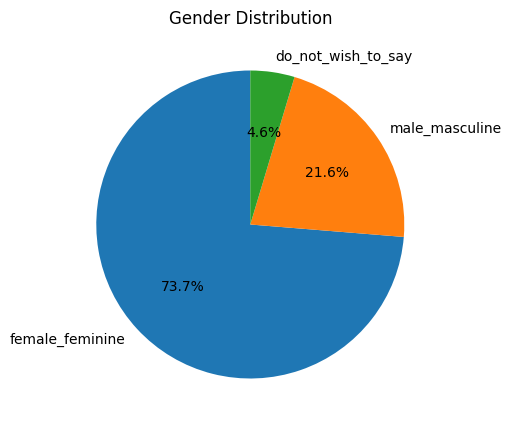

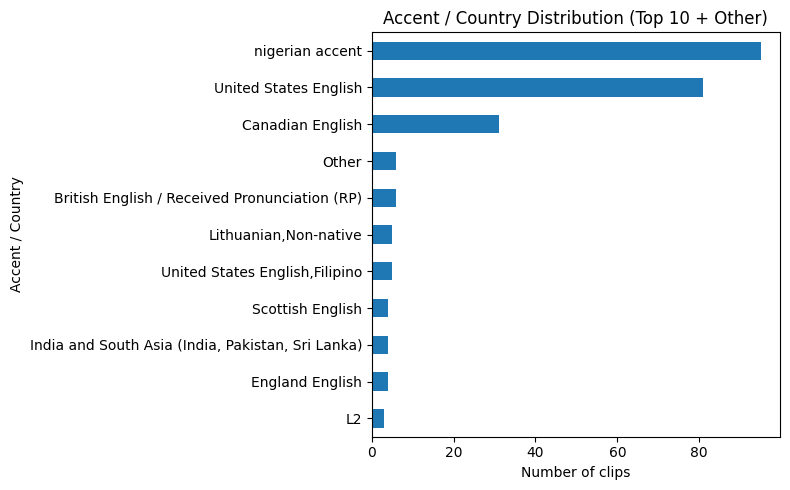

In [89]:
import matplotlib.pyplot as plt


num_samples = len(df)
print(f"Total number of validated audio samples: {num_samples}")


num_speakers = df['client_id'].nunique()
print(f"Number of unique speakers: {num_speakers}")


if 'gender' in df.columns:
    gender_counts = df['gender'].dropna().value_counts()
    print("Gender distribution:")
    print(gender_counts)

    # Pie chart for gender
    plt.figure(figsize=(5, 5))
    gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.ylabel("")  # cleaner look
    plt.title("Gender Distribution")
    plt.show()
else:
    print("No 'gender' column in this version of dataset.")

import matplotlib.pyplot as plt
import pandas as pd


accent_col = 'accents' if 'accents' in df.columns else ('accent' if 'accent' in df.columns else None)

if accent_col is not None:
    accents_counts = df[accent_col].dropna().astype(str).value_counts()


    top_n = 10
    top_accents = accents_counts.head(top_n)
    if len(accents_counts) > top_n:
        other_sum = accents_counts.iloc[top_n:].sum()
        top_accents = pd.concat([top_accents, pd.Series({'Other': other_sum})])

    
    plt.figure(figsize=(8, 5))
    top_accents.sort_values().plot(kind='barh')
    plt.xlabel("Number of clips")
    plt.ylabel("Accent / Country")
    plt.title(f"Accent / Country Distribution (Top {top_n} + Other)")
    plt.tight_layout()
    plt.show()
else:
    print("No 'accent' / 'accents' column in this version of dataset.")


In [90]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
client_id            0
path                 0
sentence_id          0
sentence             0
sentence_domain    247
up_votes             0
down_votes           0
age                 12
gender              55
accents              5
variant            249
locale               0
segment            249
dtype: int64


In [91]:
# Check number of duplicate audio files
num_duplicates = df.duplicated(subset=['path']).sum()
print(f"Number of duplicate audio paths: {num_duplicates}")

# If any → remove them:
df = df.drop_duplicates(subset=['path'])
print(f"DataFrame shape after dropping duplicates: {df.shape}")


Number of duplicate audio paths: 0
DataFrame shape after dropping duplicates: (249, 13)


In [92]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['clean_sentence'] = df['sentence'].apply(clean_text)

print(df[['sentence', 'clean_sentence']].head())


                                            sentence  \
0  He was born at Wichenford, in Worcestershire, ...   
1  The Portuguese division was overrun and withdr...   
2            Her health by this stage was also poor.   
3  His sporting interests outside of cricket incl...   
4  The following year he was elected to be part o...   

                                      clean_sentence  
0  he was born at wichenford in worcestershire an...  
1  the portuguese division was overrun and withdr...  
2             her health by this stage was also poor  
3  his sporting interests outside of cricket incl...  
4  the following year he was elected to be part o...  


In [93]:
# Filter out very short sentences (less than 2 words)
df = df[df['clean_sentence'].str.split().apply(len) >= 2]

# Check shape after filtering
print(f"DataFrame shape after filtering short sentences: {df.shape}")


DataFrame shape after filtering short sentences: (249, 14)


In [94]:
# Filter out very short sentences (less than 2 words)
df = df[df['clean_sentence'].str.split().apply(len) >= 2]

# Check shape after filtering
print(f"DataFrame shape after filtering short sentences: {df.shape}")




DataFrame shape after filtering short sentences: (249, 14)


In [95]:
print("Unique accents in dataset:")
print(df['accents'].dropna().unique())



Unique accents in dataset:
['United States English' 'England English'
 'Australian English,Canadian English' 'Scottish English'
 'India and South Asia (India, Pakistan, Sri Lanka)' 'Russian' 'Filipino'
 'Malaysian English'
 'United States English,Southern United States English,Lightly Southern'
 'L2' 'United States English,Filipino' 'Lithuanian,Non-native'
 'British English / Received Pronunciation (RP)' 'Canadian English'
 'nigerian accent']


In [96]:
#This piece of code breaks unqiue dataset accents into 2 so that each group has suffienct amount of dataset to learn . Two groups are Native and non Native

def map_accent(accent_str):
    if pd.isnull(accent_str):
        return 'Unknown'
    
    accent_str = accent_str.lower()

    native_keywords = ['united states', 'england', 'scottish', 'british', 'canadian', 'australian', 'southern']
    nonnative_keywords = ['india', 'south asia', 'filipino', 'malaysian', 'nigerian', 'l2', 'non-native', 'russian', 'lithuanian']
    
    native = any(word in accent_str for word in native_keywords)
    nonnative = any(word in accent_str for word in nonnative_keywords)

    if native and not nonnative:
        return 'Native'
    elif nonnative and not native:
        return 'Non-native'
    elif native and nonnative:
        return 'Mixed'
    else:
        return 'Other'

# Apply function
df['accent_group'] = df['accents'].apply(map_accent)

# Show distribution
print(df['accent_group'].value_counts())


accent_group
Native        129
Non-native    110
Unknown         5
Mixed           5
Name: count, dtype: int64


In [97]:
import os
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
#librosa — loads audio & extracts MFCCs
#tqdm — shows progress bar while looping files

# Define your dataset root
dataset_path = "D:/cv-corpus-21.0-delta-2025-03-14/en"
clips_path = os.path.join(dataset_path, "clips")
tsv_path = os.path.join(dataset_path, "validated.tsv")

# Load metadata
df = pd.read_csv(tsv_path, sep="\t")

# Filter missing or short data
df = df[df['sentence'].notnull()]
df = df[df['sentence'].str.strip() != '']





In [98]:

def extract_mfcc(file_path, n_mfcc=13, sr=16000):
    try:
        y, sr = librosa.load(file_path, sr=sr)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        mfcc_mean = np.mean(mfcc.T, axis=0)  # Average across time axis
        return mfcc_mean
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


In [99]:
df['accent_group'] = df['accents'].apply(map_accent)

# Keep only rows with accent_group
df = df[df['accent_group'].notnull()]

features = []
labels = []

print("Extracting MFCCs from audio clips...")

for index, row in tqdm(df.iterrows(), total=len(df)):
    file_name = row['path']
    file_path = os.path.join(clips_path, file_name)
    
    mfcc = extract_mfcc(file_path)
    if mfcc is not None:
        features.append(mfcc)
        labels.append(row['accent_group'])

# Convert to arrays
X = np.array(features)
y = np.array(labels)

print("Finished! Shape of feature matrix:", X.shape)
print("Number of labels:", len(y))


Extracting MFCCs from audio clips...


100%|████████████████████████████████████████████████████████████████████████████████| 249/249 [00:02<00:00, 96.93it/s]

Finished! Shape of feature matrix: (249, 13)
Number of labels: 249


In [100]:

np.save("mfcc_features.npy", X)
np.save("mfcc_labels.npy", y)


In [101]:
#Implementiong Models , Logistic regression :

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [103]:

X = np.load("mfcc_features.npy")
y = np.load("mfcc_labels.npy")


le = LabelEncoder()
y_encoded = le.fit_transform(y)  

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [104]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Test Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

       Mixed       0.50      1.00      0.67         1
      Native       0.79      0.85      0.81        26
  Non-native       0.79      0.68      0.73        22
     Unknown       0.00      0.00      0.00         1

    accuracy                           0.76        50
   macro avg       0.52      0.63      0.55        50
weighted avg       0.77      0.76      0.76        50



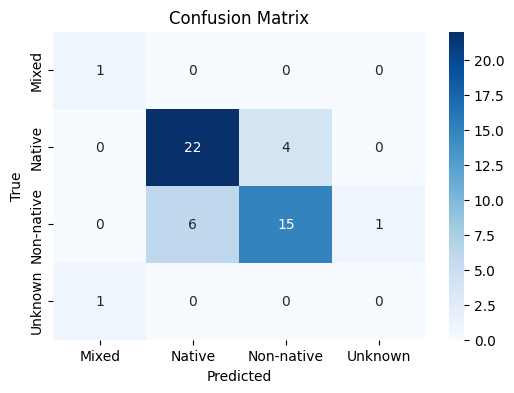

In [105]:
# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [106]:
test_audio_path = 'Testing audio.wav'  # or provide full path if needed

# Function to extract averaged MFCCs 
def extract_mfcc_for_test(file_path, n_mfcc=13, sr=16000):
    y, sr = librosa.load(file_path, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = np.mean(mfcc.T, axis=0)  # Average over time
    return mfcc_mean.reshape(1, -1)      # Reshape for model input

In [107]:
# Extract and scale features
test_features = extract_mfcc_for_test(test_audio_path)
test_features_scaled = scaler.transform(test_features)  # use the same scaler from training

# Predict using the trained model
prediction = model.predict(test_features_scaled)

# Decode prediction back to original label
predicted_accent_group = le.inverse_transform(prediction)[0]
print(f"Predicted Accent Group: {predicted_accent_group}")


Predicted Accent Group: Non-native


In [108]:
# CNN
import os
import librosa
import numpy as np
from tqdm import tqdm

def extract_mfcc_2d(file_path, n_mfcc=40, sr=16000, max_len=100):
    try:
        y, sr = librosa.load(file_path, sr=sr)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        
        # Pad or trim to fixed length (for CNN input)
        if mfcc.shape[1] < max_len:
            pad_width = max_len - mfcc.shape[1]
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc = mfcc[:, :max_len]
        
        return mfcc
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


In [109]:
mfcc_2d_list = []
label_list = []

for i, row in tqdm(df.iterrows(), total=len(df)):
    file_name = row['path']
    file_path = os.path.join(clips_path, file_name)
    mfcc_2d = extract_mfcc_2d(file_path)
    if mfcc_2d is not None:
        mfcc_2d_list.append(mfcc_2d)
        label_list.append(row['accent_group'])

X_cnn = np.array(mfcc_2d_list)
y_cnn = np.array(label_list)

# Reshape for CNN: (samples, height, width, channels)
X_cnn = X_cnn[..., np.newaxis]
print("Shape of X for CNN:", X_cnn.shape)


100%|████████████████████████████████████████████████████████████████████████████████| 249/249 [00:02<00:00, 95.82it/s]

Shape of X for CNN: (249, 40, 100, 1)


In [110]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le_cnn = LabelEncoder()
y_cnn_encoded = le_cnn.fit_transform(y_cnn)
y_cnn_cat = to_categorical(y_cnn_encoded)



In [111]:
from sklearn.model_selection import train_test_split

X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    X_cnn, y_cnn_cat, test_size=0.2, random_state=42, stratify=y_cnn_cat)


In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(40, 100, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_cnn_cat.shape[1], activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn.summary()


C:\Users\HF\anaconda3\envs\tf-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 38, 98, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 19, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 17, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 23, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 11776)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11776)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         753,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 772,804 (2.95 MB)

 Trainable params: 772,804 (2.95 MB)

 Non-trainable params: 0 (0.00 B)

In [113]:
history = model_cnn.fit(
    X_train_cnn, y_train_cnn,
    epochs=20,
    batch_size=16,
    validation_data=(X_test_cnn, y_test_cnn)
)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.4947 - loss: 15.7508 - val_accuracy: 0.5200 - val_loss: 1.8331
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6632 - loss: 1.1302 - val_accuracy: 0.7000 - val_loss: 0.7184
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7749 - loss: 0.6809 - val_accuracy: 0.7800 - val_loss: 0.6114
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8172 - loss: 0.4407 - val_accuracy: 0.8000 - val_loss: 0.4575
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9304 - loss: 0.2063 - val_accuracy: 0.7400 - val_loss: 0.5558
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9459 - loss: 0.1450 - val_accuracy: 0.8800 - val_loss: 0.4149
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9794 - loss: 0.0738 - val_accuracy: 0.8800 - val_loss: 0.4392
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9917 - loss: 0.0464 - val_accuracy: 0.8600 - 

In [114]:
import librosa
import numpy as np

def extract_mfcc_for_cnn(file_path, n_mfcc=40, sr=16000, max_len=100):
    y, sr = librosa.load(file_path, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Pad or truncate
    if mfcc.shape[1] < max_len:
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    
    # Reshape to CNN input shape: (1, 40, 100, 1)
    mfcc = mfcc.reshape(1, n_mfcc, max_len, 1)
    return mfcc


In [115]:

test_audio_path = 'Testing audio.wav'  


test_mfcc = extract_mfcc_for_cnn(test_audio_path)
cnn_prediction = model_cnn.predict(test_mfcc)


predicted_class_index = np.argmax(cnn_prediction, axis=1)
predicted_label = le_cnn.inverse_transform(predicted_class_index)[0]

print(f"Predicted Accent Group (CNN): {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted Accent Group (CNN): Non-native


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Test Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

       Mixed       0.00      0.00      0.00         1
      Native       0.82      0.88      0.85        26
  Non-native       0.86      0.86      0.86        22
     Unknown       0.00      0.00      0.00         1

    accuracy                           0.84        50
   macro avg       0.42      0.44      0.43        50
weighted avg       0.81      0.84      0.82        50



C:\Users\HF\anaconda3\envs\tf-env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HF\anaconda3\envs\tf-env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HF\anaconda3\envs\tf-env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


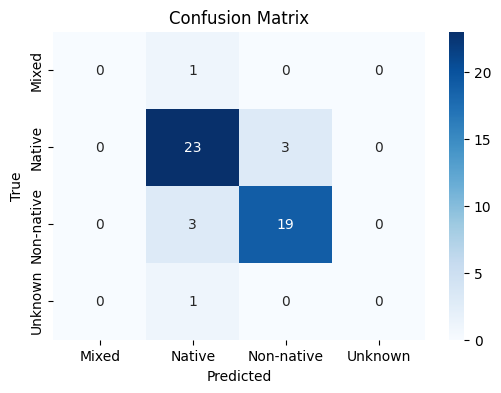

In [116]:
# Predict on test set
y_pred_probs = model_cnn.predict(X_test_cnn)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert y_test_cnn (one-hot) to class indices
y_test_labels = np.argmax(y_test_cnn, axis=1)

# Accuracy
acc = accuracy_score(y_test_labels, y_pred)
print(f"Test Accuracy: {acc:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred, target_names=le_cnn.classes_))

# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_cnn.classes_, yticklabels=le_cnn.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [117]:
%pip install -q faster-whisper g2p_en nltk unidecode av

import nltk
# one-time downloads for g2p_en internals
for pkg in ["averaged_perceptron_tagger_eng", "punkt"]:
    try:
        nltk.data.find(f"taggers/{pkg}/" if "tagger" in pkg else f"tokenizers/{pkg}")
    except LookupError:
        nltk.download(pkg, quiet=True)


Note: you may need to restart the kernel to use updated packages.


In [118]:
from faster_whisper import WhisperModel
from g2p_en import G2p


whisper_model = WhisperModel("small", device="cpu", compute_type="int8")
g2p = G2p()


C:\Users\HF\anaconda3\envs\tf-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [119]:
import math, re
from typing import List, Dict, Tuple

PHONE_TIPS = {
    "V": {"tip": "Lower lip to upper teeth; voice ON.", "examples": ["vine–wine", "vote–wote"]},
    "W": {"tip": "Rounded lips; no teeth contact; voice ON.", "examples": ["west–vest", "wine–vine"]},
    "TH": {"tip": "Tongue between teeth; air through (voiceless).", "examples": ["think–tink", "thought–taught"]},
    "DH": {"tip": "Tongue between teeth; voiced.", "examples": ["this–dis", "those–doze"]},
    "Z": {"tip": "Tip near ridge; voice ON (buzz).", "examples": ["zoo–sue", "zip–sip"]},
    "S": {"tip": "Tip near ridge; voice OFF (hiss).", "examples": ["sip–zip", "seal–zeal"]},
    "R": {"tip": "British /ɹ/: close, not touching.", "examples": ["right–light"]},
    "L": {"tip": "Tip touches ridge; release cleanly.", "examples": ["light–right"]},
    "IY": {"tip": "Long close /iː/ (sheep).", "examples": ["sheep–ship"]},
    "IH": {"tip": "Short lax /ɪ/ (ship).", "examples": ["ship–sheep"]},
    "AE": {"tip": "Open front /æ/ (cat).", "examples": ["bad–bed"]},
    "EH": {"tip": "Mid front /ɛ/ (bed).", "examples": ["bed–bad"]},
    "CH": {"tip": "Affricate /tʃ/ (chip).", "examples": ["chip–ship"]},
    "SH": {"tip": "Fricative /ʃ/ (ship).", "examples": ["ship–chip"]},
}
def coarse_phone(p: str):
    p = p.upper().rstrip("012")
    for k in ["V","W","Z","S","R","L","IY","IH","AE","EH","CH","SH","TH","DH"]:
        if p == k: return k
    return None

def transcribe_with_words(audio_path: str):
    segments, _ = whisper_model.transcribe(
        audio_path, word_timestamps=True, vad_filter=True,
        vad_parameters={"min_silence_duration_ms": 300}
    )
    words, full_text = [], []
    for seg in segments:
        if seg.text: full_text.append(seg.text)
        for w in (seg.words or []):
            if w.word.strip():
                words.append({"word": w.word.strip(),
                              "start": float(w.start),
                              "end": float(w.end),
                              "prob": float(w.probability) if (w.probability is not None) else 0.0})
    return " ".join(full_text).strip(), words

def compute_thresholds(words):
    durs = [w["end"] - w["start"] for w in words] or [0.3]
    durs.sort()
    p90 = durs[int(0.9 * (len(durs)-1))]
    return {"dur_p90": max(0.2, p90)}

def word_risk(word, dur_p90, w_conf=0.7, w_dur=0.3):
    dur = word["end"] - word["start"]
    conf_term = 1.0 - word["prob"]
    dur_term = max(0.0, (dur - dur_p90) / dur_p90)
    return w_conf * conf_term + w_dur * dur_term

def word_phonemes(word_text: str):
    # g2p_en returns phones + punctuation; keep phones
    raw = g2p(word_text.lower())
    phones = [t for t in raw if any(c.isalpha() for c in t)]
    coarse = []
    for p in phones:
        c = coarse_phone(p)
        if c and c not in coarse:
            coarse.append(c)
    return phones, coarse

def build_hints(coarse_phones: List[str]):
    tips = {}
    examples = []
    for p in coarse_phones[:2]:
        tips[p] = PHONE_TIPS[p]["tip"]
        examples.extend(PHONE_TIPS[p]["examples"][:2])
    # dedupe
    seen, dedup = set(), []
    for ex in examples:
        if ex not in seen:
            seen.add(ex); dedup.append(ex)
    return tips, dedup[:4]

def analyze_audio(audio_path: str,
                  base_conf_thresh: float = 0.75,
                  min_duration: float = 0.08):
    text, words = transcribe_with_words(audio_path)
    if not words:
        return {"transcript": text, "flagged": []}
    th = compute_thresholds(words)
    flagged = []
    for w in words:
        if (w["end"] - w["start"]) < min_duration:  # ignore tiny tokens
            continue
        risk = word_risk(w, th["dur_p90"])
        if (w["prob"] < base_conf_thresh) or (risk > 0.35):
            phones, coarse = word_phonemes(w["word"])
            tips, ex = build_hints(coarse)
            flagged.append({
                "word": w["word"],
                "start": round(w["start"], 2),
                "end": round(w["end"], 2),
                "confidence": round(w["prob"], 3),
                "duration": round(w["end"] - w["start"], 2),
                "risk": round(risk, 3),
                "phonemes": phones,
                "tips": tips,
                "examples": ex
            })
    return {"transcript": text, "flagged": flagged}


In [120]:
import pandas as pd

audio_path = r"D:\Testing audio.wav"  

result = analyze_audio(audio_path)

print("Transcript:", result["transcript"], "\n")

if not result["flagged"]:
    print("🎉 No obvious word-level issues found.")
else:
    df = pd.DataFrame(result["flagged"])
    # Make tips/examples human-friendly
    df["tips"] = df["tips"].apply(lambda d: "; ".join([f"{k}: {v}" for k,v in d.items()]) if isinstance(d, dict) else "")
    df["examples"] = df["examples"].apply(lambda xs: ", ".join(xs))
    display(df[["word","start","end","confidence","duration","risk","phonemes","tips","examples"]])


Transcript: Hello, I am a student at University of Hertfordshire, I am a master student and I am working on a data science project. 



,word,start,end,confidence,duration,risk,phonemes,tips,examples
0,University,2.64,3.26,0.569,0.62,0.302,"[Y, UW2, N, AH0, V, ER1, S, AH0, T, IY0]",V: Lower lip to upper teeth; voice ON.; S: Tip...,"vine–wine, vote–wote, sip–zip, seal–zeal"
1,master,6.08,6.56,0.664,0.48,0.235,"[M, AE1, S, T, ER0]",AE: Open front /æ/ (cat).; S: Tip near ridge; ...,"bad–bed, sip–zip, seal–zeal"
2,student,6.56,7.34,0.435,0.78,0.396,"[S, T, UW1, D, AH0, N, T]",S: Tip near ridge; voice OFF (hiss).,"sip–zip, seal–zeal"
3,and,7.34,8.30,0.715,0.96,0.269,"[AH0, N, D]",,
4,am,9.11,9.23,0.582,0.12,0.293,"[AE1, M]",AE: Open front /æ/ (cat).,bad–bed
5,project.,11.33,12.85,0.750,1.52,0.460,"[P, R, AA1, JH, EH0, K, T]","R: British /ɹ/: close, not touching.; EH: Mid ...","right–light, bed–bad"


In [121]:
import re, difflib
from typing import List, Tuple, Optional, Dict

def normalize_tokens(s: str) -> List[str]:
    """lowercase + keep letters/apostrophes → tokens"""
    return re.findall(r"[a-zA-Z']+", s.lower())

def align_ref_hyp(ref_tokens: List[str], hyp_tokens: List[str]) -> List[Tuple[str, Optional[str], Optional[str], Optional[int]]]:
    """
    Return ops aligning reference words to hypothesis words.
    Each item: (op, ref_word|None, hyp_word|None, hyp_index|None)
    op ∈ {"OK","SUB","INS","DEL"}.
    hyp_index maps back to ASR words so we can attach timestamps/confidence.
    """
    sm = difflib.SequenceMatcher(a=ref_tokens, b=hyp_tokens, autojunk=False)
    ops = []
    for tag, a0, a1, b0, b1 in sm.get_opcodes():
        if tag == "equal":
            for i in range(a1 - a0):
                ops.append(("OK", ref_tokens[a0+i], hyp_tokens[b0+i], b0+i))
        elif tag == "replace":
            n = min(a1 - a0, b1 - b0)
            for i in range(n):
                ops.append(("SUB", ref_tokens[a0+i], hyp_tokens[b0+i], b0+i))
            for i in range(n, a1 - a0):
                ops.append(("DEL", ref_tokens[a0+i], None, None))
            for i in range(n, b1 - b0):
                ops.append(("INS", None, hyp_tokens[b0+i], b0+i))
        elif tag == "delete":
            for i in range(a0, a1):
                ops.append(("DEL", ref_tokens[i], None, None))
        elif tag == "insert":
            for i in range(b0, b1):
                ops.append(("INS", None, hyp_tokens[i], i))
    return ops



In [122]:
import pandas as pd

def analyze_audio_with_reference(audio_path: str,
                                 reference_text: str,
                                 base_conf_thresh: float = 0.75,
                                 min_duration: float = 0.08):
    # 1) ASR once → words with times & probs
    text, words = transcribe_with_words(audio_path)
    timed = [(w["start"], w["end"], w["prob"], w["word"]) for w in words]

   
    flagged = []
    if words:
        th = compute_thresholds(words)
        for w in words:
            if (w["end"] - w["start"]) < min_duration:
                continue
            risk = word_risk(w, th["dur_p90"])
            if (w["prob"] < base_conf_thresh) or (risk > 0.35):
                phones, coarse = word_phonemes(w["word"])
                tips, ex = build_hints(coarse)
                flagged.append({
                    "reason": "risk",
                    "op": "",
                    "expected": "",
                    "spoken": w["word"],
                    "start": round(w["start"], 2),
                    "end": round(w["end"], 2),
                    "confidence": round(w["prob"], 3),
                    "duration": round(w["end"] - w["start"], 2),
                    "risk": round(risk, 3),
                    "phonemes": phones,
                    "tips": tips,
                    "examples": ex
                })

    # 3) Reference alignment (SUB/INS/DEL with timestamps where possible)
    ref_tokens = normalize_tokens(reference_text or "")
    hyp_tokens = [w["word"].lower().strip(".,?!:;\"'") for w in words]
    ops = align_ref_hyp(ref_tokens, hyp_tokens)

    counts = {"OK":0,"SUB":0,"INS":0,"DEL":0}
    for op, ref_w, hyp_w, hyp_idx in ops:
        counts[op] += 1
        if op == "OK": 
            continue
        start = end = conf = dur = None
        surface = hyp_w if hyp_w else ref_w  # what to display
        if hyp_idx is not None and 0 <= hyp_idx < len(timed):
            start, end, conf, hyp_surface = timed[hyp_idx]
            dur = end - start
        phones, coarse = word_phonemes(surface or "")
        tips, ex = build_hints(coarse)
        flagged.append({
            "reason": "alignment",
            "op": op,                          # SUB / INS / DEL
            "expected": ref_w or "",
            "spoken": hyp_w or "",
            "start": round(start,2) if start is not None else -1.0,
            "end": round(end,2) if end is not None else -1.0,
            "confidence": round(conf,3) if conf is not None else 0.0,
            "duration": round(dur,2) if dur is not None else 0.0,
            "risk": 1.0,                       # bubble to top in sorting
            "phonemes": phones,
            "tips": tips,
            "examples": ex
        })

    # 4) Summary metrics
    N = max(1, len(ref_tokens))
    S, I, D = counts["SUB"], counts["INS"], counts["DEL"]
    wer = (S + I + D) / N

    result = {
        "transcript": text,
        "reference": reference_text,
        "flags": flagged,
        "alignment_counts": counts,
        "wer": round(wer, 3)
    }
    return result

def show_alignment_table(result, top_n=None):
    print("Reference:", result["reference"])
    print("Transcript:", result["transcript"])
    print(f"WER: {result['wer']}  |  Ops: {result['alignment_counts']}\n")

    df = pd.DataFrame(result["flags"])
    if df.empty:
        print("✅ No issues detected.")
        return df

    # make tips/examples readable
    df["tips"] = df["tips"].apply(lambda d: "; ".join([f"{k}: {v}" for k,v in d.items()]) if isinstance(d, dict) else "")
    df["examples"] = df["examples"].apply(lambda xs: ", ".join(xs))

    # sort: alignment first, then by risk desc, then low confidence first
    df = df.sort_values(by=["reason","risk","confidence"], ascending=[True, False, True])
    if top_n:
        df = df.head(top_n)

    display(df[[
        "reason","op","expected","spoken",
        "start","end","confidence","duration","risk",
        "phonemes","tips","examples"
    ]])
    return df


In [123]:
audio_path = r"D:\Testing audio.wav"
reference_text = "Hello, I am a student at University of Hertfordshire, I am a master student and I am working on a data science project."  

res = analyze_audio_with_reference(audio_path, reference_text)
_ = show_alignment_table(res, top_n=12)


Reference: Hello, I am a student at University of Hertfordshire, I am a master student and I am working on a data science project.
Transcript: Hello, I am a student at University of Hertfordshire, I am a master student and I am working on a data science project.
WER: 0.0  |  Ops: {'OK': 23, 'SUB': 0, 'INS': 0, 'DEL': 0}



,reason,op,expected,spoken,start,end,confidence,duration,risk,phonemes,tips,examples
5,risk,,,project.,11.33,12.85,0.750,1.52,0.460,"[P, R, AA1, JH, EH0, K, T]","R: British /ɹ/: close, not touching.; EH: Mid ...","right–light, bed–bad"
2,risk,,,student,6.56,7.34,0.435,0.78,0.396,"[S, T, UW1, D, AH0, N, T]",S: Tip near ridge; voice OFF (hiss).,"sip–zip, seal–zeal"
0,risk,,,University,2.64,3.26,0.569,0.62,0.302,"[Y, UW2, N, AH0, V, ER1, S, AH0, T, IY0]",V: Lower lip to upper teeth; voice ON.; S: Tip...,"vine–wine, vote–wote, sip–zip, seal–zeal"
4,risk,,,am,9.11,9.23,0.582,0.12,0.293,"[AE1, M]",AE: Open front /æ/ (cat).,bad–bed
3,risk,,,and,7.34,8.30,0.715,0.96,0.269,"[AH0, N, D]",,
1,risk,,,master,6.08,6.56,0.664,0.48,0.235,"[M, AE1, S, T, ER0]",AE: Open front /æ/ (cat).; S: Tip near ridge; ...,"bad–bed, sip–zip, seal–zeal"


In [124]:
import pandas as pd

def basic_corrections(res):
    rows=[]
    for f in res.get("flags", []):
        if f.get("reason")=="alignment" and f.get("op")=="SUB":
            exp, spk = f.get("expected",""), f.get("spoken","")
            phones, coarse = word_phonemes(spk or exp or "")
            tip = next((f"{p}: {PHONE_TIPS[p]['tip']}" for p in coarse if p in PHONE_TIPS), "Articulate more clearly; slow down.")
            pair = next((PHONE_TIPS[p]["examples"][0] for p in coarse if p in PHONE_TIPS and PHONE_TIPS[p]["examples"]), "")
            rows.append({
                "time": f"{f.get('start',-1)}–{f.get('end',-1)}",
                "expected": exp,
                "spoken": spk,
                "suggestion": tip,
                "practice_pair": pair
            })
    return pd.DataFrame(rows) if rows else pd.DataFrame([{"info":"No substitutions; check risk-flagged words above."}])

basic_corrections(res)


,info
0,No substitutions; check risk-flagged words above.


In [125]:
import pandas as pd
from collections import defaultdict
from typing import List, Tuple
import numpy as np

# reuse g2p_en + PHONE_TIPS + coarse_phone() from earlier cells
# (assumes you already have: g2p, PHONE_TIPS, coarse_phone, word_phonemes)

# Define coachable confusion pairs (both directions) with short messages
CONFUSIONS = {
    ("V","W"): {"msg":"/v/ vs /w/: lower lip touches upper teeth (voiced) vs rounded lips, no teeth contact.",
                "pairs":["vine–wine","vest–west","view–wew"]},
    ("W","V"): {"msg":"/w/ vs /v/: rounded lips (voiced) vs lower lip on upper teeth.",
                "pairs":["wine–vine","west–vest"]},
    ("TH","T"): {"msg":"/θ/ voiceless ‘th’: tongue between teeth, gentle air; not a /t/ stop.",
                 "pairs":["think–tink","thin–tin"]},
    ("DH","D"): {"msg":"/ð/ voiced ‘th’: tongue lightly between teeth with voicing; not /d/.",
                 "pairs":["this–dis","those–doze"]},
    ("Z","S"): {"msg":"/z/ is voiced (buzz), /s/ is voiceless (hiss).",
                "pairs":["zoo–sue","zip–sip"]},
    ("S","Z"): {"msg":"/s/ is voiceless (hiss), /z/ is voiced (buzz).",
                "pairs":["sip–zip","seal–zeal"]},
    ("R","L"): {"msg":"/ɹ/ vs /l/: British /ɹ/ doesn’t touch; /l/ touches the ridge.",
                "pairs":["right–light"]},
    ("L","R"): {"msg":"/l/ vs /ɹ/: tip touches ridge for /l/; for /ɹ/ keep close but don’t touch.",
                "pairs":["light–right"]},
    ("IY","IH"): {"msg":"/iː/ (sheep) long & tense vs /ɪ/ (ship) short & lax.",
                  "pairs":["sheep–ship"]},
    ("IH","IY"): {"msg":"/ɪ/ (ship) short & lax vs /iː/ (sheep) long & tense.",
                  "pairs":["ship–sheep"]},
    ("AE","EH"): {"msg":"/æ/ (bad) more open vs /ɛ/ (bed) mid front.",
                  "pairs":["bad–bed"]},
    ("EH","AE"): {"msg":"/ɛ/ (bed) mid front vs /æ/ (bad) more open.",
                  "pairs":["bed–bad"]},
    ("CH","SH"): {"msg":"/tʃ/ (chip) is affricate (stop+fricative) vs /ʃ/ (ship) fricative.",
                  "pairs":["chip–ship"]},
    ("SH","CH"): {"msg":"/ʃ/ (ship) fricative vs /tʃ/ (chip) affricate.",
                  "pairs":["ship–chip"]},
}

def coarse_phones_of_word(w: str) -> List[str]:
    phones, coarse = word_phonemes(w)
    return coarse

def phoneme_edit_suggestions(expected_word: str, spoken_word: str) -> List[Tuple[str,str,dict]]:
    """
    Return a list of confusion suggestions as tuples:
      (expected_phone, spoken_phone, info_dict)
    """
    exp = coarse_phones_of_word(expected_word) if expected_word else []
    spk = coarse_phones_of_word(spoken_word) if spoken_word else []

    # quick heuristic: compare phone sets and pair likely substitutions
    # try to align by order where possible
    suggestions = []
    L = min(len(exp), len(spk))
    # 1) check aligned positions
    for i in range(L):
        e, s = exp[i], spk[i]
        if e != s and (e, s) in CONFUSIONS:
            suggestions.append((e, s, CONFUSIONS[(e, s)]))
    # 2) check unmatched phones (set-based) as a fallback
    extra_e = [p for p in exp if p not in spk]
    extra_s = [p for p in spk if p not in exp]
    for e in extra_e:
        for s in extra_s:
            if (e, s) in CONFUSIONS:
                suggestions.append((e, s, CONFUSIONS[(e, s)]))
    # dedupe
    uniq = []
    seen = set()
    for e, s, info in suggestions:
        key = (e, s, info["msg"])
        if key not in seen:
            seen.add(key); uniq.append((e, s, info))
    return uniq

def build_coaching_from_alignment(res, top_n=10):
    """
    From Step-2 result (with alignment), produce a concise coaching table for SUBs.
    """
    rows = []
    flags = res.get("flags", [])
    # focus on substitutions only (spoken != expected)
    subs = [f for f in flags if f.get("reason")=="alignment" and f.get("op")=="SUB"]
    for f in subs:
        exp, spk = f.get("expected",""), f.get("spoken","")
        suggs = phoneme_edit_suggestions(exp, spk)
        if not suggs:
            # fallback: at least attach generic tips for the spoken word phones
            phones, coarse = word_phonemes(spk or exp or "")
            msg = "Focus on clearer articulation; see tips."
            rows.append({
                "expected": exp, "spoken": spk,
                "time": f"{f.get('start',-1)}–{f.get('end',-1)}",
                "confidence": f.get("confidence",0.0),
                "suggestion": msg,
                "tips": "; ".join([f"{k}: {PHONE_TIPS[k]['tip']}" for k in coarse if k in PHONE_TIPS][:2]),
                "pairs": ", ".join(sum([PHONE_TIPS[k]["examples"][:1] for k in coarse if k in PHONE_TIPS], []))
            })
        else:
            # create one row per confusion (usually 1)
            for e, s, info in suggs:
                rows.append({
                    "expected": exp, "spoken": spk,
                    "time": f"{f.get('start',-1)}–{f.get('end',-1)}",
                    "confidence": f.get("confidence",0.0),
                    "suggestion": f"Likely {e}→{s}. {info['msg']}",
                    "tips": "; ".join([f"{s}: {PHONE_TIPS.get(s,{}).get('tip','')}"]) if s in PHONE_TIPS else "",
                    "pairs": ", ".join(info["pairs"])
                })
    df = pd.DataFrame(rows)
    # prioritize lowest confidence first (harder cases) and recent times
    if not df.empty:
        def tstart(x):
            try:
                return float((x or "0").split("–")[0])
            except Exception:
                return 0.0
        df = df.sort_values(by=["confidence"], ascending=True).head(top_n)
        df.insert(0, "rank", range(1, len(df)+1))
    return df

# ---- run on your latest Step-2 result 'res' ----
coaching = build_coaching_from_alignment(res, top_n=10)
display(coaching if not coaching.empty else pd.DataFrame([{"info":"No clear phoneme-level substitution detected."}]))


,info
0,No clear phoneme-level substitution detected.
